<a href="https://colab.research.google.com/github/Far25ooq/Cancer/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('data.csv')
df.head(7)


Saving data.csv to data (1).csv


,attrib_name,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,ER.Status,PR.Status,HER2.Status,gender,radiation_therapy,race,ethnicity,Median_overall_survival,overall_survival,status,overallsurvival
0,TCGA.5L.AAT0,42.0,0.6501,stageii,t2,n0,m0,infiltratinglobularcarcinoma,0.0,NaN,NaN,NaN,NaN,female,yes,white,hispanicorlatino,0.0,1477.0,0.0,"1477,0"
1,TCGA.5L.AAT1,63.0,0.5553,stageiv,t2,n0,m1,infiltratinglobularcarcinoma,0.0,NaN,NaN,NaN,NaN,female,no,white,hispanicorlatino,0.0,1471.0,0.0,"1471,0"
2,TCGA.A1.A0SP,40.0,0.6913,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,Basal,NaN,NaN,NaN,female,NaN,NaN,nothispanicorlatino,0.0,584.0,0.0,"584,0"
3,TCGA.A2.A04V,39.0,0.8341,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,LumA,NaN,NaN,NaN,female,no,white,nothispanicorlatino,0.0,1920.0,1.0,"1920,1"
4,TCGA.A2.A04Y,53.0,0.7318,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumB,NaN,NaN,NaN,female,yes,white,NaN,0.0,1099.0,0.0,"1099,0"
5,TCGA.A2.A0CQ,62.0,0.7701,stagei,t1,n0,m0,infiltratingductalcarcinoma,0.0,LumA,NaN,NaN,NaN,female,yes,blackorafricanamerican,nothispanicorlatino,0.0,2695.0,0.0,"2695,0"
6,TCGA.A2.A1G4,71.0,0.8879,stageiii,t3,n1,m0,infiltratingductalcarcinoma,2.0,LumB,NaN,NaN,NaN,female,no,white,nothispanicorlatino,0.0,595.0,0.0,"595,0"


In [ ]:
	
#Count the number of rows and columns in the data set
df.shape


(1097, 21)

In [ ]:

#Create a list of columns to retain
columns_to_retain = [ "years_to_birth", "Tumor_purity","pathologic_stage",  "pathology_T_stage",  "pathology_N_stage" ,"pathology_M_stage", "histological_type",  "number_of_lymph_nodes",  "PAM50" ,"gender",  "radiation_therapy" ,"race",  "ethnicity",  "Median_overall_survival",  "overall_survival","status"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)


In [ ]:
df.shape

(1097, 16)

In [ ]:
df.dtypes

years_to_birth             float64
Tumor_purity               float64
pathologic_stage            object
pathology_T_stage           object
pathology_N_stage           object
pathology_M_stage           object
histological_type           object
number_of_lymph_nodes      float64
PAM50                       object
gender                      object
radiation_therapy           object
race                        object
ethnicity                   object
Median_overall_survival    float64
overall_survival           float64
status                     float64
dtype: object

In [ ]:
# Drop the rows with na or missing values
df = df.dropna(axis=0)


In [ ]:
df.shape

(460, 16)

In [ ]:
#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,2]= labelencoder_Y.fit_transform(df.iloc[:,2].values)
df.iloc[:,3]= labelencoder_Y.fit_transform(df.iloc[:,3].values)
df.iloc[:,4]= labelencoder_Y.fit_transform(df.iloc[:,4].values)
df.iloc[:,5]= labelencoder_Y.fit_transform(df.iloc[:,5].values)
df.iloc[:,6]= labelencoder_Y.fit_transform(df.iloc[:,6].values)
df.iloc[:,8]= labelencoder_Y.fit_transform(df.iloc[:,8].values)
df.iloc[:,9]= labelencoder_Y.fit_transform(df.iloc[:,9].values)
df.iloc[:,10]= labelencoder_Y.fit_transform(df.iloc[:,10].values)
df.iloc[:,11]= labelencoder_Y.fit_transform(df.iloc[:,11].values)
df.iloc[:,12]= labelencoder_Y.fit_transform(df.iloc[:,12].values)
#df.iloc[:,13]= labelencoder_Y.fit_transform(df.iloc[:,13].values)

In [ ]:
df.head(7)

,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,gender,radiation_therapy,race,ethnicity,Median_overall_survival,overall_survival,status
3,39.0,0.8341,1,1,0,0,0,0.0,2,0,0,2,1,0.0,1920.0,1.0
5,62.0,0.7701,0,0,0,0,0,0.0,2,0,1,1,1,0.0,2695.0,0.0
6,71.0,0.8879,2,2,1,0,0,2.0,3,0,0,2,1,0.0,595.0,0.0
8,66.0,0.8525,0,0,0,0,0,0.0,2,0,1,2,1,0.0,1165.0,0.0
11,55.0,0.6312,0,0,0,0,6,0.0,0,0,1,2,1,0.0,738.0,0.0
12,72.0,0.7811,1,0,1,0,0,0.0,2,0,0,2,1,0.0,724.0,0.0
13,65.0,0.7381,1,1,0,0,0,0.0,0,0,1,2,1,0.0,661.0,0.0


In [ ]:
corrmat = df.corr()
corrmat

,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,gender,radiation_therapy,race,ethnicity,Median_overall_survival,overall_survival,status
years_to_birth,1.000000,0.080543,-0.036723,-0.007037,-0.013687,0.050664,0.052984,0.040357,0.096298,0.068070,-0.106078,0.140386,0.012235,-0.077610,-0.175299,0.086013
Tumor_purity,0.080543,1.000000,0.091058,0.075346,0.105961,0.049993,0.072036,0.043145,0.221957,0.018817,-0.109497,0.028342,-0.030575,0.098947,0.008719,0.048785
pathologic_stage,-0.036723,0.091058,1.000000,0.690741,0.715546,0.309671,0.064186,0.544579,0.026427,0.052298,0.087868,0.010936,0.053406,0.007103,-0.052917,0.243603
pathology_T_stage,-0.007037,0.075346,0.690741,1.000000,0.259555,0.113283,0.113790,0.225397,-0.007752,0.045772,-0.006496,-0.044854,0.038695,0.106319,0.041667,0.188542
pathology_N_stage,-0.013687,0.105961,0.715546,0.259555,1.000000,0.247692,-0.018365,0.769065,0.119844,0.044048,0.172909,0.018676,0.049697,-0.021577,-0.047465,0.206051
pathology_M_stage,0.050664,0.049993,0.309671,0.113283,0.247692,1.000000,-0.056571,0.213273,-0.013958,-0.015294,-0.022890,0.051289,0.027614,0.041461,0.088480,0.282876
histological_type,0.052984,0.072036,0.064186,0.113790,-0.018365,-0.056571,1.000000,0.051943,0.037808,0.030574,-0.041145,0.048706,0.035407,0.063757,0.022092,0.024426
number_of_lymph_nodes,0.040357,0.043145,0.544579,0.225397,0.769065,0.213273,0.051943,1.000000,0.069552,0.077992,0.131006,0.017855,0.071315,0.067321,0.024410,0.245148
PAM50,0.096298,0.221957,0.026427,-0.007752,0.119844,-0.013958,0.037808,0.069552,1.000000,0.107098,0.011032,0.212816,0.042159,-0.050199,-0.044478,0.001576
gender,0.068070,0.018817,0.052298,0.045772,0.044048,-0.015294,0.030574,0.077992,0.107098,1.000000,-0.058663,-0.001597,-0.168708,-0.027560,-0.035094,-0.046216


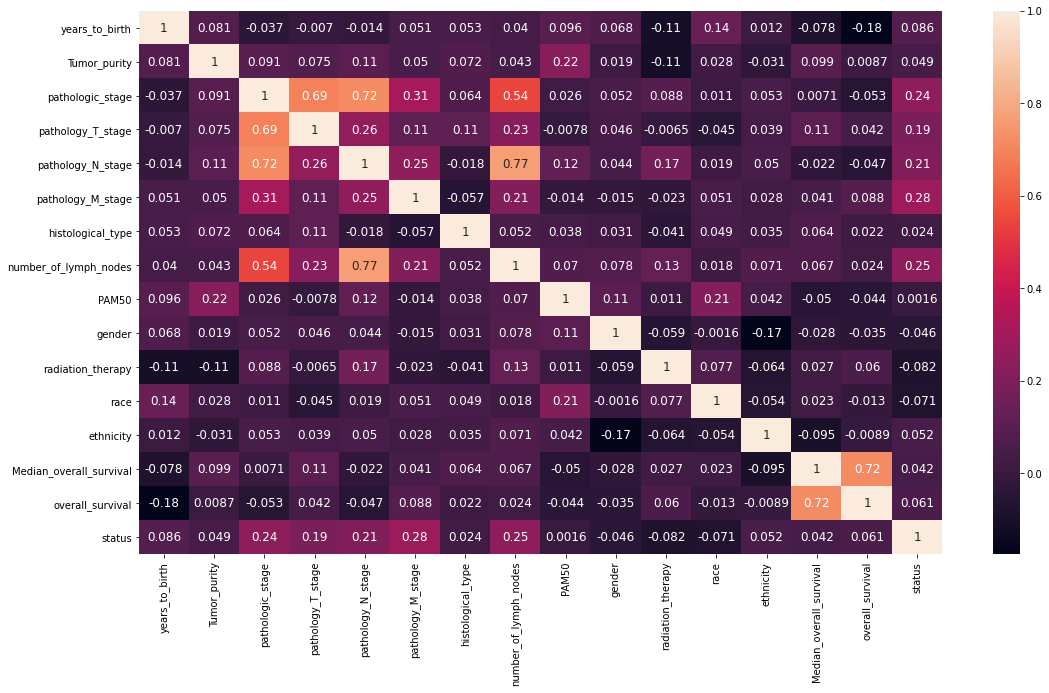

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [ ]:
corrmat.index.values

array(['years_to_birth', 'Tumor_purity', 'pathologic_stage',
       'pathology_T_stage', 'pathology_N_stage', 'pathology_M_stage',
       'histological_type', 'number_of_lymph_nodes', 'PAM50', 'gender',
       'radiation_therapy', 'race', 'ethnicity',
       'Median_overall_survival', 'overall_survival', 'status'],
      dtype=object)

In [ ]:

    da = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return dadef getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            

In [ ]:
threshold = 0.20
corr_value = getCorrelatedFeature(corrmat['status'], threshold)
corr_value

,Corr Value
pathologic_stage,0.243603
pathology_N_stage,0.206051
pathology_M_stage,0.282876
number_of_lymph_nodes,0.245148
status,1.000000


In [ ]:

corr_value.index.values

array(['pathologic_stage', 'pathology_N_stage', 'pathology_M_stage',
       'number_of_lymph_nodes', 'status'], dtype=object)

In [ ]:
correlated_data = df[corr_value.index]
correlated_data.head()

,pathologic_stage,pathology_N_stage,pathology_M_stage,number_of_lymph_nodes,status
3,1,0,0,0.0,1.0
5,0,0,0,0.0,0.0
6,2,1,0,2.0,0.0
8,0,0,0,0.0,0.0
11,0,0,0,0.0,0.0


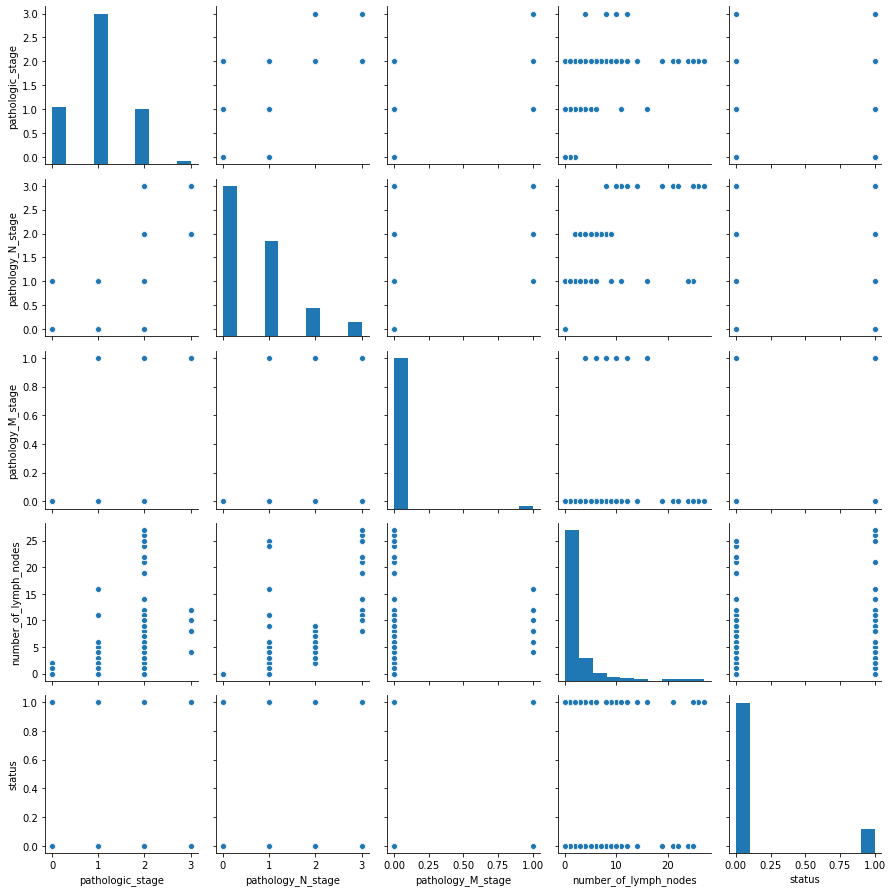

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

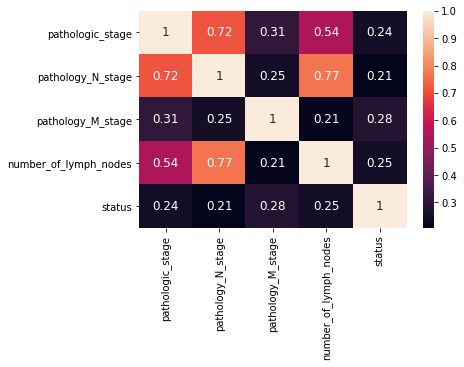

In [ ]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

In [ ]:
correlated_data

,pathologic_stage,pathology_N_stage,pathology_M_stage,number_of_lymph_nodes,status
3,1,0,0,0.0,1.0
5,0,0,0,0.0,0.0
6,2,1,0,2.0,0.0
8,0,0,0,0.0,0.0
11,0,0,0,0.0,0.0
...,...,...,...,...,...
1022,2,1,0,3.0,0.0
1023,1,0,0,0.0,0.0
1024,2,2,0,5.0,0.0
1025,2,3,0,10.0,0.0


In [ ]:
#Split the data into independent 'X' and dependent 'Y' variables
X = correlated_data.iloc[:, 0:4].values #Notice I started from index 1 to 16, essentially removing the id column & diagnosis
Y = correlated_data.iloc[:,4].values #Get the target variable 'diagnosis' located at index=1

In [ ]:
X.shape

(460, 4)

In [ ]:
# Split the dataset into 75% Training set and 25% Testing set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)
  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)
  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [ ]:
 #gating all the models.	
                             model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8579710144927536
[1]K Nearest Neighbor Training Accuracy: 0.8608695652173913
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8579710144927536
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8579710144927536
[4]Gaussian Naive Bayes Training Accuracy: 0.8434782608695652
[5]Decision Tree Classifier Training Accuracy: 0.8782608695652174
[6]Random Forest Classifier Training Accuracy: 0.8724637681159421


In [ ]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)

  print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[103   0]
 [  9   3]]
Model[0] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [  9   3]]
Model[1] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [  9   3]]
Model[2] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [ 10   2]]
Model[3] Testing Accuracy = "0.9130434782608695!"

[[100   3]
 [  9   3]]
Model[4] Testing Accuracy = "0.8956521739130435!"

[[100   3]
 [ 10   2]]
Model[5] Testing Accuracy = "0.8869565217391304!"

[[99  4]
 [ 9  3]]
Model[6] Testing Accuracy = "0.8869565217391304!"



In [ ]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)

  print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line


[[103   0]
 [  9   3]]
Model[0] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [  9   3]]
Model[1] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [  9   3]]
Model[2] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [ 10   2]]
Model[3] Testing Accuracy = "0.9130434782608695!"

[[100   3]
 [  9   3]]
Model[4] Testing Accuracy = "0.8956521739130435!"

[[100   3]
 [ 10   2]]
Model[5] Testing Accuracy = "0.8869565217391304!"

[[99  4]
 [ 9  3]]
Model[6] Testing Accuracy = "0.8869565217391304!"



In [ ]:
#sification accuracy & other metShow other ways to get the clasrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       103
         1.0       1.00      0.25      0.40        12

    accuracy                           0.92       115
   macro avg       0.96      0.62      0.68       115
weighted avg       0.93      0.92      0.90       115

0.9217391304347826

Model  1
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       103
         1.0       1.00      0.25      0.40        12

    accuracy                           0.92       115
   macro avg       0.96      0.62      0.68       115
weighted avg       0.93      0.92      0.90       115

0.9217391304347826

Model  2
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       103
         1.0       1.00      0.25      0.40        12

    accuracy                           0.92       115
   macro avg       0.96      0.62      0.68       115
weighte

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:

model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
110,0.0,0.0
111,1.0,0.0
112,0.0,0.0
113,1.0,0.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
correlated_data.columns

Index(['pathologic_stage', 'pathology_T_stage', 'pathology_N_stage',
       'pathology_M_stage', 'number_of_lymph_nodes', 'status'],
      dtype='object')

In [ ]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  -0.674757281553398
mae:  0.1565217391304348
mse:  0.1565217391304348


In [ ]:
X = correlated_data.drop(labels=['status'], axis = 1)
Y = correlated_data['status']
X.head()

,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,number_of_lymph_nodes
3,1,1,0,0,0.0
5,0,0,0,0,0.0
6,2,2,1,0,2.0
8,0,0,0,0,0.0
11,0,0,0,0,0.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:

X_train.shape, X_test.shape

((345, 5), (115, 5))

In [ ]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)
  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)
  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest



In [ ]:
                                       #gating all the models.	
                             model = models(X_train,Y_train)


[0]Logistic Regression Training Accuracy: 0.8521739130434782
[1]K Nearest Neighbor Training Accuracy: 0.8608695652173913
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8579710144927536
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8521739130434782
[4]Gaussian Naive Bayes Training Accuracy: 0.8434782608695652
[5]Decision Tree Classifier Training Accuracy: 0.8985507246376812
[6]Random Forest Classifier Training Accuracy: 0.8927536231884058


In [ ]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)

  print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line


[[101   2]
 [ 10   2]]
Model[0] Testing Accuracy = "0.8956521739130435!"

[[102   1]
 [ 10   2]]
Model[1] Testing Accuracy = "0.9043478260869565!"

[[103   0]
 [  9   3]]
Model[2] Testing Accuracy = "0.9217391304347826!"

[[103   0]
 [ 12   0]]
Model[3] Testing Accuracy = "0.8956521739130435!"

[[100   3]
 [  9   3]]
Model[4] Testing Accuracy = "0.8956521739130435!"

[[98  5]
 [10  2]]
Model[5] Testing Accuracy = "0.8695652173913043!"

[[94  9]
 [ 9  3]]
Model[6] Testing Accuracy = "0.8434782608695652!"

